<a href="https://colab.research.google.com/github/0v3r-9000/trc204.github.io/blob/Regression-Practice/Customer_Segmentation_Example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

(200, 3)
(200,)


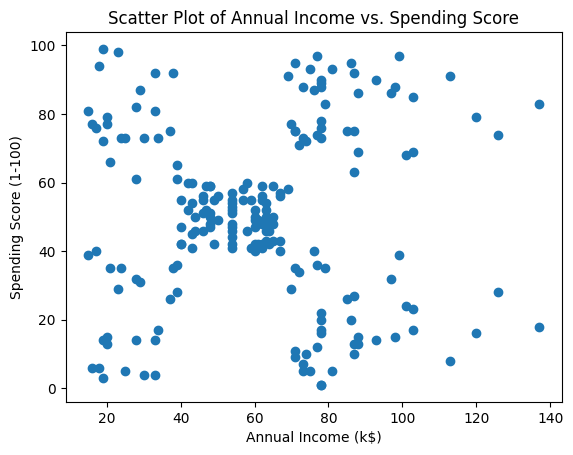

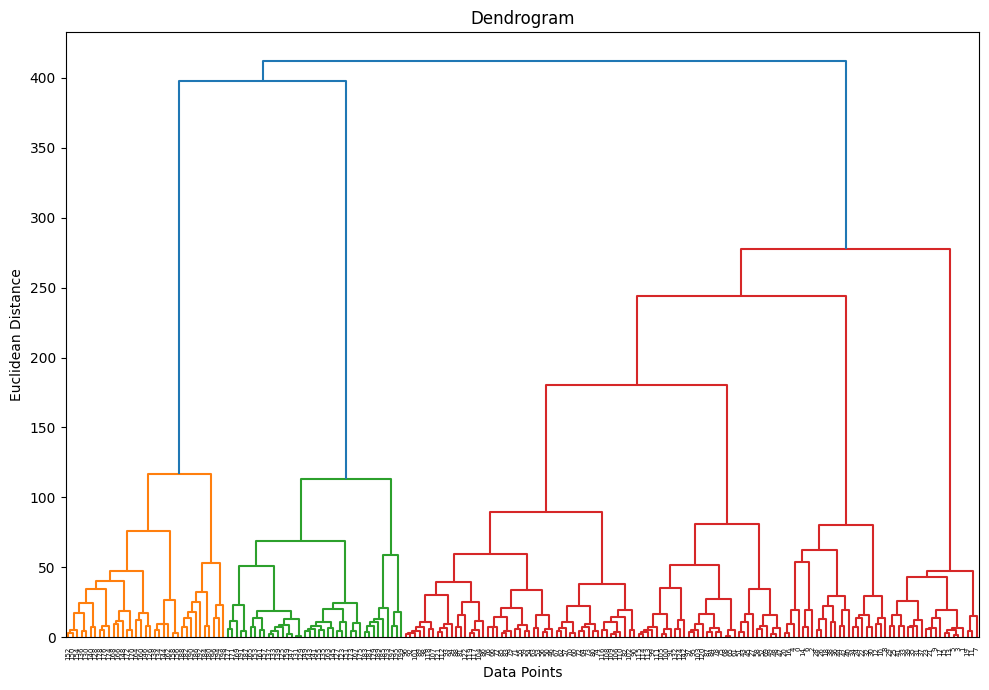

|--- Annual Income (k$) <= 70.50
|   |--- Annual Income (k$) <= 39.50
|   |   |--- Spending Score (1-100) <= 50.50
|   |   |   |--- class: 4
|   |   |--- Spending Score (1-100) >  50.50
|   |   |   |--- class: 3
|   |--- Annual Income (k$) >  39.50
|   |   |--- Spending Score (1-100) <= 68.50
|   |   |   |--- class: 0
|   |   |--- Spending Score (1-100) >  68.50
|   |   |   |--- class: 2
|--- Annual Income (k$) >  70.50
|   |--- Spending Score (1-100) <= 51.50
|   |   |--- Spending Score (1-100) <= 39.50
|   |   |   |--- class: 1
|   |   |--- Spending Score (1-100) >  39.50
|   |   |   |--- class: 0
|   |--- Spending Score (1-100) >  51.50
|   |   |--- class: 2



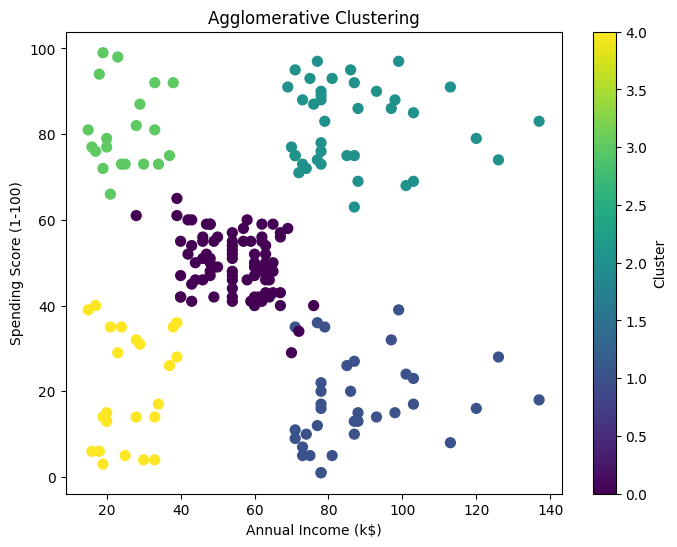

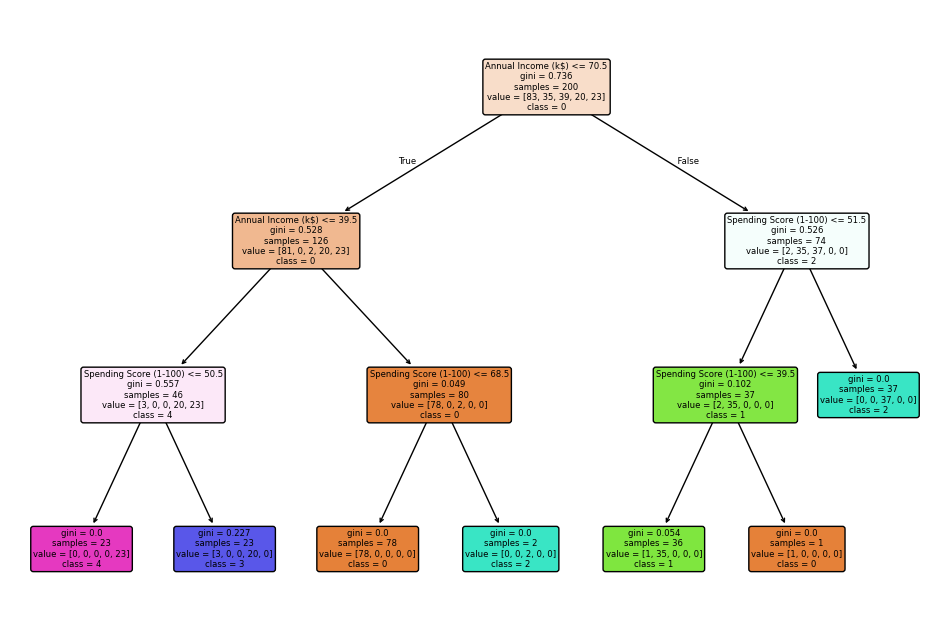

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.cluster.hierarchy import dendrogram, linkage
df = pd.read_csv('Mall_Customers.csv')
df.head()
X = np.array(df[['Gender','Age','Annual Income (k$)']])
y = np.array(df['Spending Score (1-100)'])
print(X.shape)
print(y.shape)

# Assuming 'Annual Income (k$)' is the third column (index 2) in your X array
plt.scatter(X[:, 2], y)  # Selects all rows and the 3rd column for x-axis
plt.xlabel('Annual Income (k$)')  # Label the x-axis
plt.ylabel('Spending Score (1-100)')  # Label the y-axis
plt.title('Scatter Plot of Annual Income vs. Spending Score')  # Add a title
plt.show()
# Assuming df is your DataFrame
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].values
# Select numerical features and convert to NumPy array

link = linkage(X, method='ward', metric='euclidean')

# Create the dendrogram with customizations for better readability
plt.figure(figsize=(10, 7))  # Adjust figure size for better visibility
dendrogram(link,
           orientation='top',  # Orient dendrogram horizontally
           labels=df.index.tolist(),  # Use DataFrame index as labels
           distance_sort='descending',  # Sort clusters by distance
           show_leaf_counts=True)  # Show number of data points in each cluster

plt.xlabel('Data Points')
plt.ylabel('Euclidean Distance')
plt.title('Dendrogram')
plt.xticks(rotation=90)  # Rotate x-axis labels for readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()
# Assuming df is your DataFrame and you want to use
# 'Age', 'Annual Income (k$)', and 'Spending Score (1-100)' for clustering
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].values

# Create the AgglomerativeClustering model
# You can adjust the number of clusters (n_clusters) as needed
# Create the AgglomerativeClustering model
# You can adjust the number of clusters (n_clusters) as needed
cluster_model = AgglomerativeClustering(n_clusters=5, linkage='ward')  # Remove affinity='euclidean'
# Fit the model to your data
cluster_model.fit(X)

# Get cluster labels for each data point
cluster_labels = cluster_model.labels_

# Create a new DataFrame with the cluster labels
df_with_clusters = df.copy()
df_with_clusters['Cluster'] = cluster_labels

# Now, we'll create a simple decision tree to visualize the clustering
# (Note: This tree might not be a perfect representation,
# but it gives a general idea)

# For simplicity, let's use a DecisionTreeClassifier
# (you might need to adjust this based on your specific needs)
from sklearn.tree import DecisionTreeClassifier
tree_model = DecisionTreeClassifier(max_depth=3)  # Adjust max_depth for tree complexity

# Fit the decision tree to the data with cluster labels
tree_model.fit(X, cluster_labels)

# Export the decision tree structure as text
tree_rules = export_text(tree_model, feature_names=['Age', 'Annual Income (k$)', 'Spending Score (1-100)'])
print(tree_rules)
# Assuming df is your DataFrame and you want to use
# 'Age', 'Annual Income (k$)', and 'Spending Score (1-100)' for clustering
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].values

# Create the AgglomerativeClustering model
# You can adjust the number of clusters (n_clusters) as needed
cluster_model = AgglomerativeClustering(n_clusters=5, linkage='ward')  # Remove affinity='euclidean'

# Fit the model to your data
cluster_model.fit(X)

# Get cluster labels for each data point
cluster_labels = cluster_model.labels_

# Create a scatter plot of the clusters
plt.figure(figsize=(8, 6))  # Adjust figure size if needed
# Scatter plot using two features (e.g., 'Annual Income (k$)' and 'Spending Score (1-100)')
plt.scatter(X[:, 1], X[:, 2], c=cluster_labels, cmap='viridis', s=50)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Agglomerative Clustering')
plt.colorbar(label='Cluster')  # Add a colorbar to show cluster assignments
plt.show()
# Assuming df is your DataFrame and you want to use
# 'Age', 'Annual Income (k$)', and 'Spending Score (1-100)' for clustering
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].values

# ... (Agglomerative Clustering code remains the same) ...

# Now, we'll create a simple decision tree to visualize the clustering
tree_model = DecisionTreeClassifier(max_depth=3)  # Adjust max_depth for tree complexity
tree_model.fit(X, cluster_labels)

# Plot the decision tree
plt.figure(figsize=(12, 8))  # Adjust figure size as needed
plot_tree(tree_model,
          feature_names=['Age', 'Annual Income (k$)', 'Spending Score (1-100)'],
          class_names=[str(i) for i in range(5)],  # Assuming 5 clusters
          filled=True,
          rounded=True)
plt.show()